### This is a WinBUGS program for the artificial example in Chapter 12, Section 12.6.

Model: Nonlinear Structural Equation Model with nonignorable missing data

Data Set Names: YO.dat and IR.dat

Sample Size: N = 712

In [11]:
source(".Rprofile")

#### Model

In [12]:
path <- lst(
    bugs = glue("{getwd()}/Chapter12/ch12-BUGS-model.txt")#,
    # jags = glue("{getwd()}/Chapter6/ch6-JAGS-model.txt"),
    # nimble = glue("{getwd()}/Chapter6/ch6-nimble-model.txt")
)

#### Data

In [13]:
data <- lst(
    N = 712,
    P = 8,
    u = c(0,0),
    RR = matrix(
        c(  2.3, 0.3,
            0.3, 1.6 ),
        nrow = 2,
        byrow = TRUE
    ),
   y = matrix(
        scan(
            file = "./Chapter12/ch12-WinBUGS-data.dat",
            what = numeric(),
            sep = ",",
            skip = 2,
            nlines = N
        ),
        nrow = N,
        byrow = TRUE
    )[,1:P],
   R = matrix(
        scan(
            file = "./Chapter12/ch12-WinBUGS-data.dat",
            what = numeric(),
            sep = ",",
            skip = 717,
            nlines = N,
            strip.white = TRUE
        ) %>% na.omit(),
        ncol = P,
        byrow = TRUE
    )
)

Warning message in matrix(scan(file = "./Chapter12/ch12-WinBUGS-data.dat", what = numeric(), :
“data length [6407] is not a sub-multiple or multiple of the number of rows [712]”


#### Three different initial values

In [15]:
inits <- lst(
     inits1 = list(
          gam = c(-0.5, -0.5, -0.5),
          lam = c(-0.4, -0.4, -0.4, -0.4, -0.4),
          b = c(-0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2),
          psi = c(0.6, 0.7, 0.8, 0.75, 0.65, 0.76, 0.85, 0.89),
          psd = 0.27,
          vu = c(-0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1),
          phi = structure(
               .Data = c(
                    0.42, 0.0,
                    0.0,  0.25
               ),
               .Dim = c(2,2)
          )
     ),
     inits2 = list(
          gam = c(0.5, 0.5, 0.5),
          lam = c(0.4, 0.4, 0.4, 0.4, 0.4),
          b = c(0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5),
          psi = c(0.3, 0.47, 0.48, 0.5, 0.35, 0.36, 0.45, 0.49),
          psd = 0.3,
          vu = c(0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1),
          phi = structure(
               .Data = c(
                    0.57, -0.25,
                    -0.25, 0.46
               ),
               .Dim = c(2,2)
          )
     ),
     inits3 = list(
          gam = c(0.0, 0.0, 0.0),
          lam = c(0.0, 0.0, 0.0, 0.0, 0.0), 
          b = c(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0),
          psi = c(0.73, 0.77, 0.78, 0.58, 0.75, 0.86, 0.95, 0.79),
          psd = 0.2,
          vu = c(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0),
          phi = structure(
               .Data = c(
                    0.51,-0.35,
                    -0.35,0.66
               ),
               .Dim=c(2,2)
          )
     )
)

#### Model fit parameters

In [17]:
param <- c("lam", "psi", "gam", "phi", "vu", "xi") # Monitored parameters
chains <- 3 # Chains
iter <- 10000 # Total iterations
burnin  <- 5000 # Number of iterations to discard
output_dir <- glue("{getwd()}/Chapter12/output")
if( !dir.exists(output_dir) ) dir.create(output_dir)
model <- lst()
fit <- lst()
if(file.exists("./Chapter12/fits.Rds")) {
    fit <- readRDS("./Chapter12/fits.Rds")
} else fit <- lst()

#### WinBUGS

##### Convergence

In [18]:
# R2WinBUGS::bugs(
#     data, 
#     inits, 
#     param[-5], 
#     model.file = path$bugs,
#     n.chains = chains,
#     n.iter = round(iter/3),
#     n.burnin = burnin,
#     debug = FALSE,
#     bugs.directory = glue("{Sys.getenv('HOME')}/.wine/drive_c/Program Files (x86)/WinBUGS14/"),
#     program = "WinBUGS",
#     working.directory = paste0(getwd(), "/Chapter12/output"),
#     WINE = "/usr/bin/wine",
#     WINEPATH = "/usr/bin/winepath"
# )

# coda$winbugs <- read.bugs(
#     list.files(
#         glue("{getwd()}/Chapter6/bugs-output/"),
#         pattern = "^coda\\d\\.txt$",
#         full.names = TRUE
#     )
# )
# plot(coda$winbugs)

##### Obtain Bayesian Statistics

In [19]:
# fit$winbugs <- R2WinBUGS::bugs(
#     data, 
#     inits, 
#     param, 
#     model.file = path$bugs,
#     n.chains = chains,
#     n.iter = iter,
#     n.burnin = burnin,
#     debug = FALSE,
#     bugs.directory = paste0(Sys.getenv("HOME"), "/.wine/drive_c/Program Files (x86)/WinBUGS14/"),
#     program = "WinBUGS",
#     working.directory = paste0(getwd(), "/Chapter12/output"),
#     WINE = "/usr/bin/wine",
#     WINEPATH = "/usr/bin/winepath"
# )

# fit$winbugs

#### OpenBUGS

##### Convergence

In [24]:
R2OpenBUGS::bugs(
    data, 
    inits, 
    param[-6], 
    iter,
    model.file = path$bugs,
    n.chains = chains,
    n.burnin = burnin,
    # debug = TRUE,
    # codaPkg = TRUE,
    # OpenBUGS.pgm = paste0(Sys.getenv("HOME"), "/.wine/drive_c/Program Files (x86)/OpenBUGS/OpenBUGS323/OpenBUGS.exe"),
    working.directory = paste0(getwd(), "/Chapter12/output")# ,
    # useWINE = TRUE,
    # WINE = "/usr/bin/wine",
    # WINEPATH = "/usr/bin/winepath"
)


Inference for Bugs model at "/home/pal_bjartan/Backup/PhD/SEM-test-model/Lee2007/Chapter12/ch12-BUGS-model.txt", 
Current: 3 chains, each with 10000 iterations (first 5000 discarded)
Cumulative: n.sims = 15000 iterations saved
            mean    sd    2.5%     25%     50%     75%   97.5% Rhat n.eff
lam[1]       0.8   0.2     0.6     0.7     0.8     0.9     1.2  1.0   140
lam[2]       0.3   0.1     0.1     0.2     0.3     0.4     0.6  1.0   250
lam[3]       0.3   0.1     0.1     0.2     0.3     0.4     0.6  1.0   410
lam[4]       1.0   0.2     0.6     0.8     1.0     1.1     1.4  1.1    27
lam[5]       0.4   0.1     0.2     0.3     0.4     0.5     0.6  1.0   130
psi[1]       2.0   0.4     1.5     1.7     2.0     2.3     3.1  1.0   150
psi[2]       1.5   0.2     1.2     1.4     1.5     1.6     2.0  1.0   210
psi[3]       2.1   0.6     1.4     1.7     2.0     2.4     3.5  1.0   210
psi[4]       1.1   0.1     0.9     1.0     1.1     1.1     1.2  1.0  4300
psi[5]       1.1   0.1     0.9   

Abstracting deviance ... 5000 valid values
Abstracting gam[1] ... 5000 valid values
Abstracting gam[2] ... 5000 valid values
Abstracting gam[3] ... 5000 valid values
Abstracting lam[1] ... 5000 valid values
Abstracting lam[2] ... 5000 valid values
Abstracting lam[3] ... 5000 valid values
Abstracting lam[4] ... 5000 valid values
Abstracting lam[5] ... 5000 valid values
Abstracting phi[1,1] ... 5000 valid values
Abstracting phi[1,2] ... 5000 valid values
Abstracting phi[2,1] ... 5000 valid values
Abstracting phi[2,2] ... 5000 valid values
Abstracting psi[1] ... 5000 valid values
Abstracting psi[2] ... 5000 valid values
Abstracting psi[3] ... 5000 valid values
Abstracting psi[4] ... 5000 valid values
Abstracting psi[5] ... 5000 valid values
Abstracting psi[6] ... 5000 valid values
Abstracting psi[7] ... 5000 valid values
Abstracting psi[8] ... 5000 valid values
Abstracting vu[1] ... 5000 valid values
Abstracting vu[2] ... 5000 valid values
Abstracting vu[3] ... 5000 valid values
Abstracti

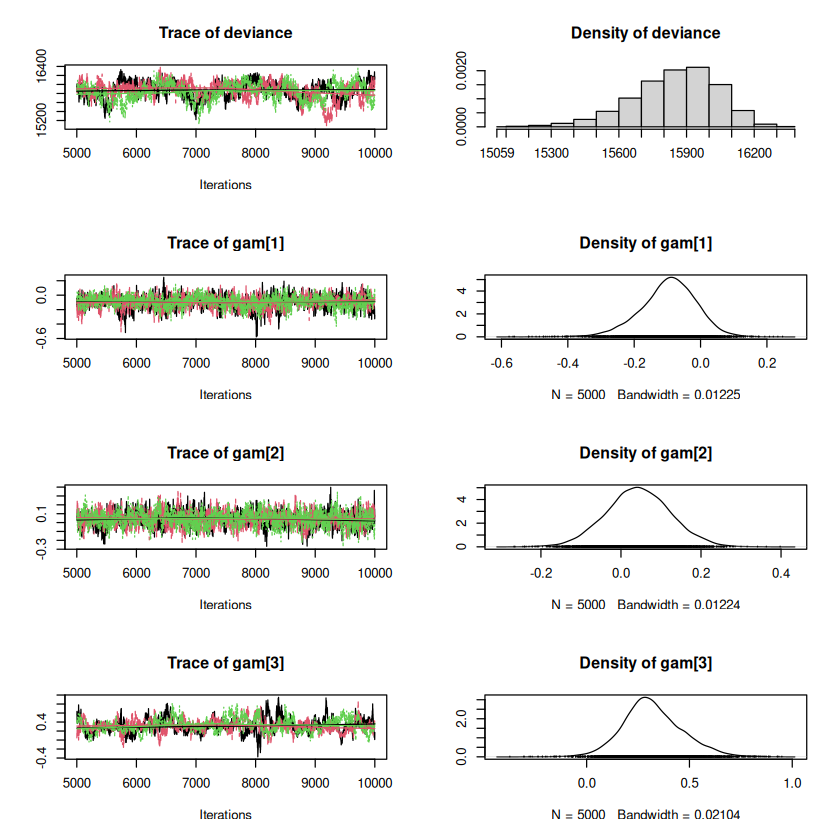

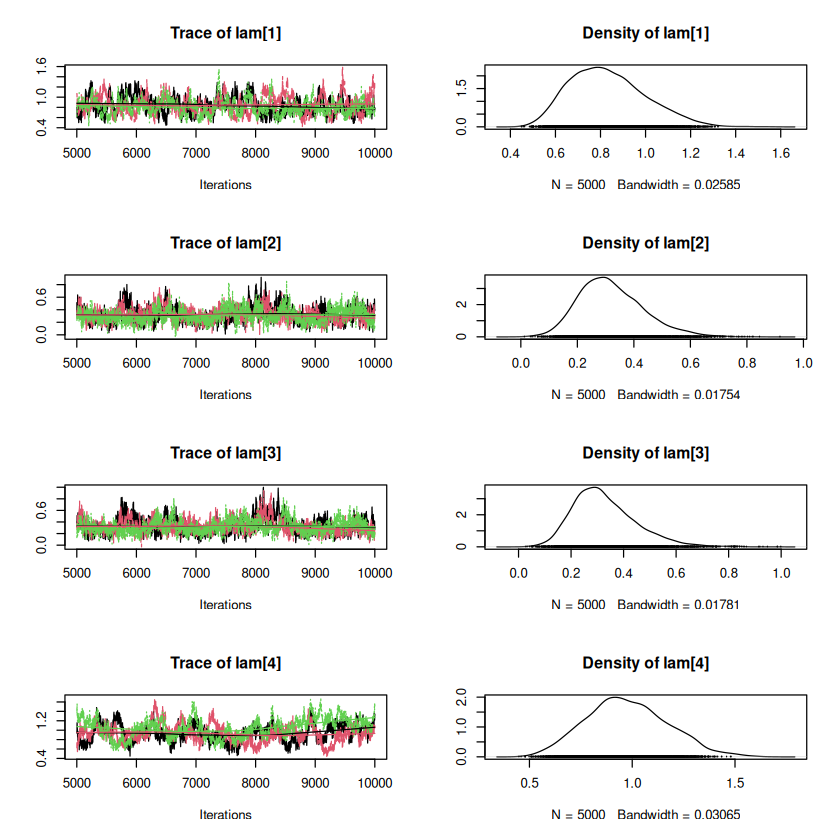

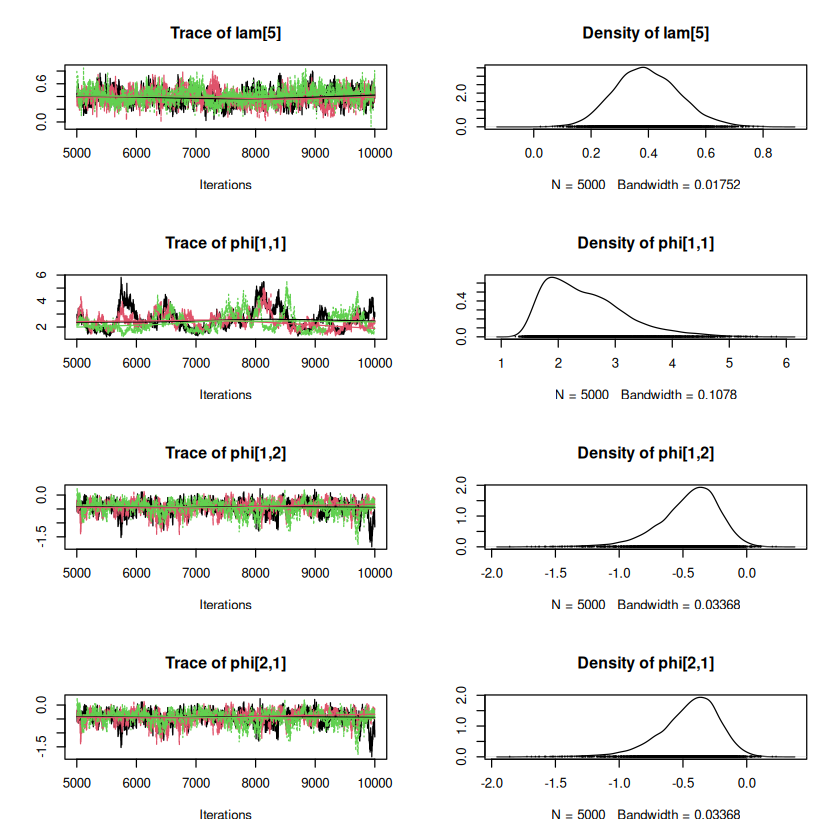

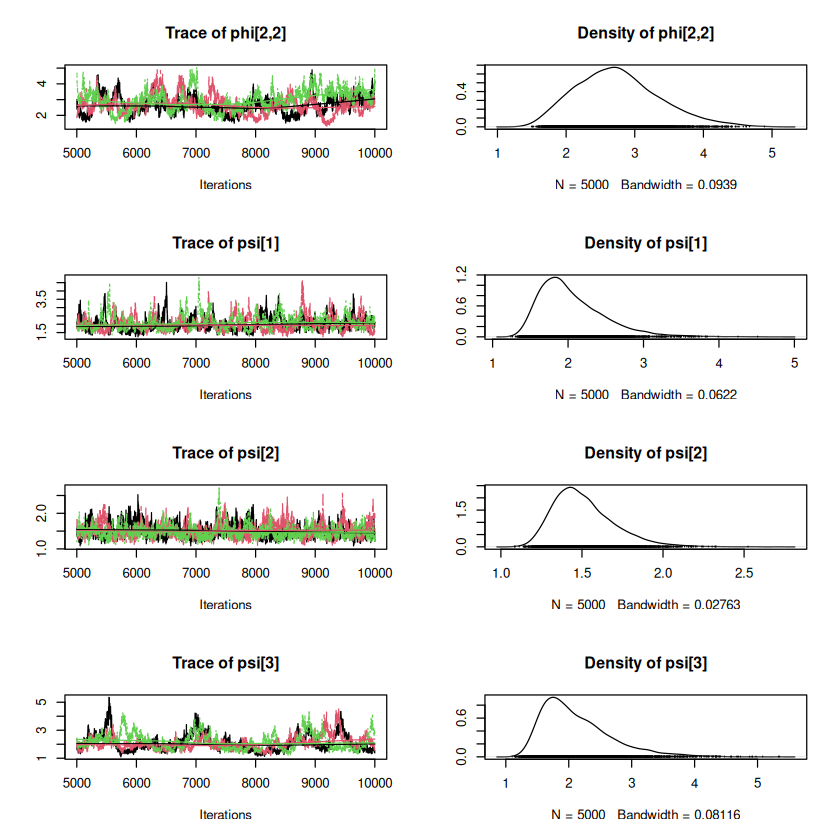

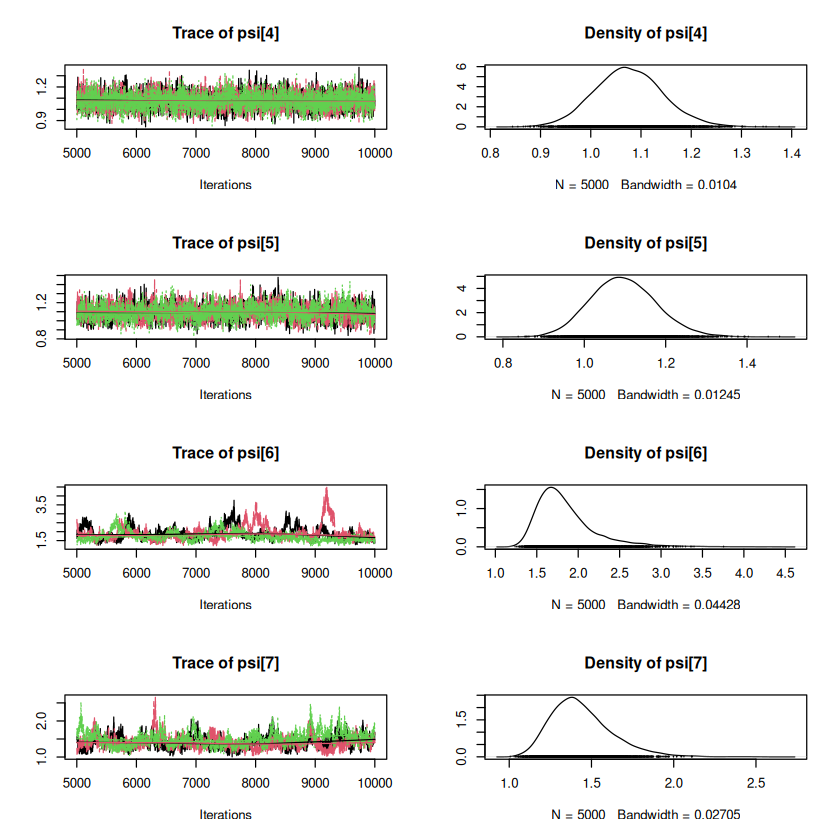

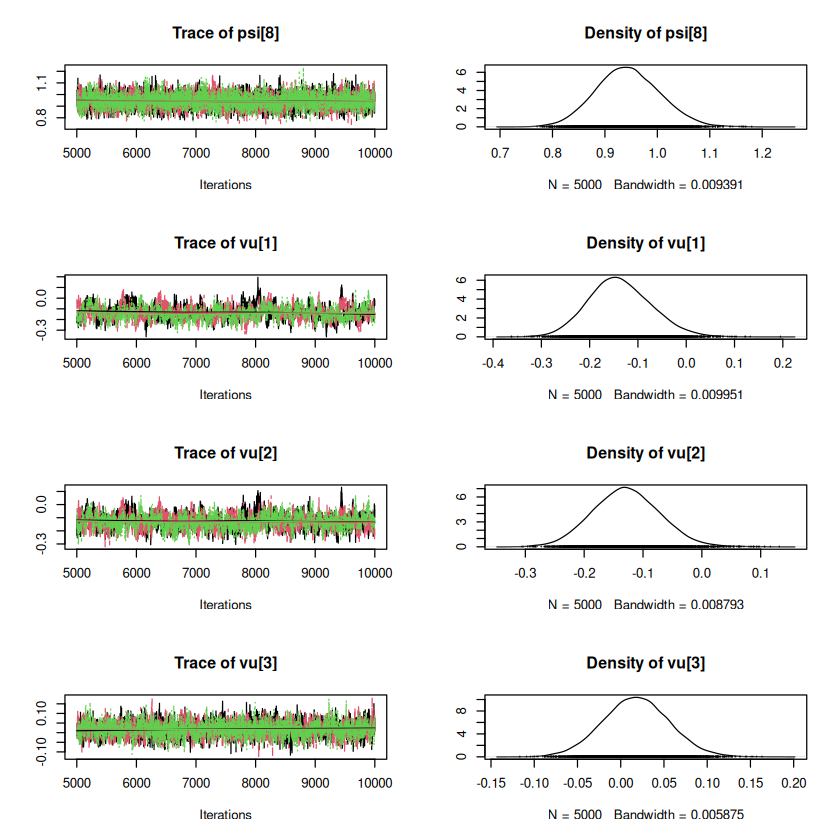

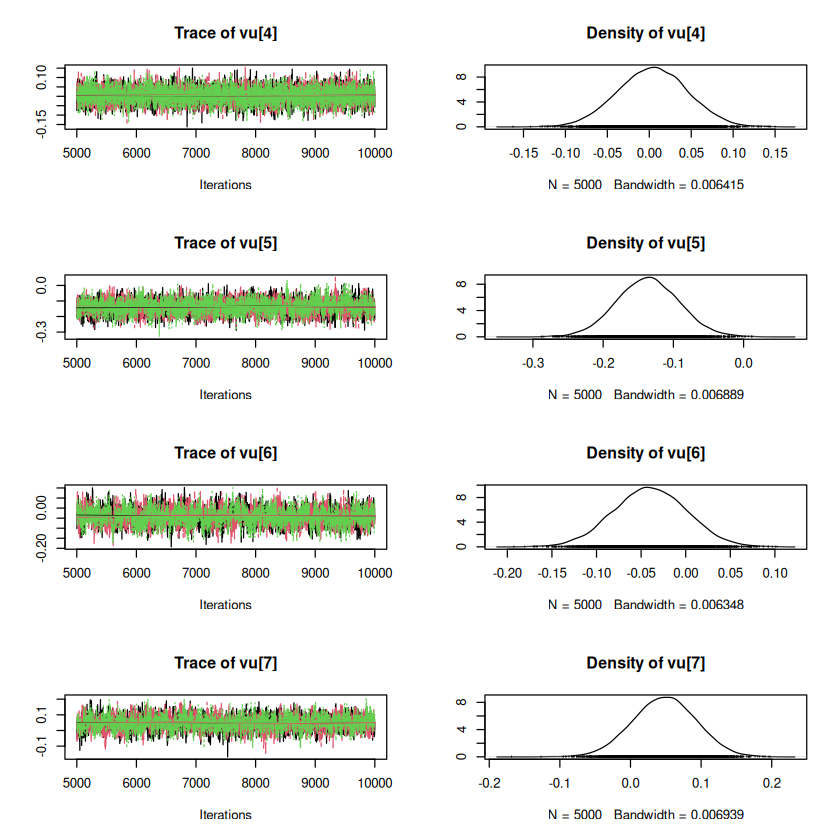

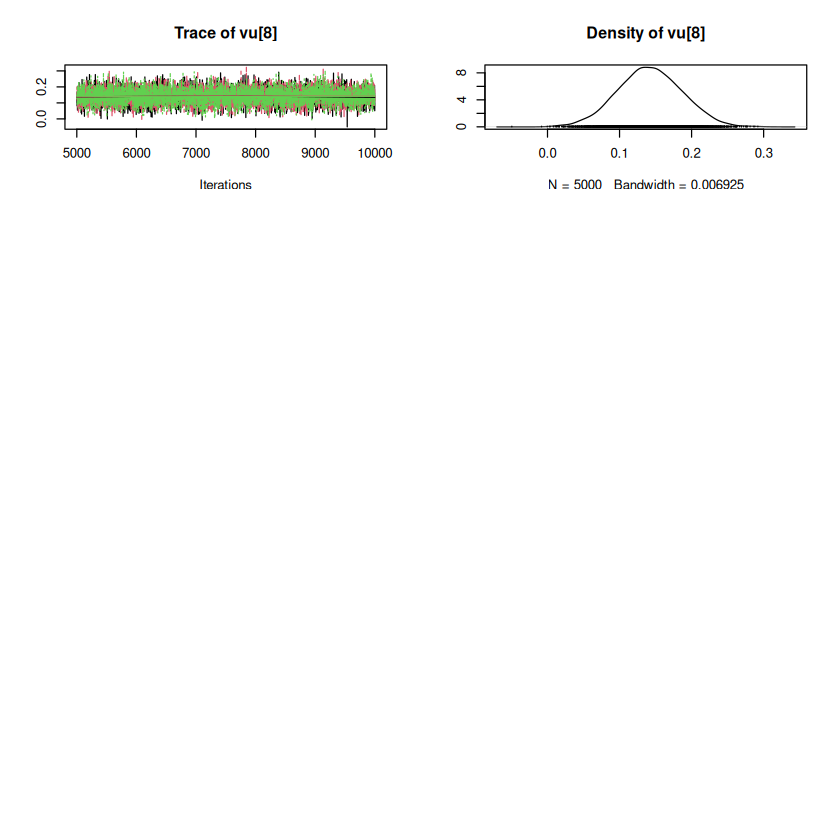

In [25]:
fit$conv$bugs <- R2OpenBUGS::read.bugs(
    list.files(
        glue("./Chapter12/output/"),
        pattern = "^CODAchain\\d\\.txt$",
        full.names = TRUE
    )
)
plot(fit$conv$bugs)

##### Obtain Bayesian Statistics

In [26]:
fit$stats$bugs <- R2OpenBUGS::bugs(
    data,
    inits,
    param, 
    iter,
    model.file = path$bugs,
    n.chains = chains,
    n.burnin = burnin,
    # debug = TRUE,
    # codaPkg = TRUE,
    # OpenBUGS.pgm = paste0(Sys.getenv("HOME"), "/.wine/drive_c/Program Files (x86)/OpenBUGS/OpenBUGS323/OpenBUGS.exe"),
    working.directory = paste0(getwd(), "/Chapter12/output")# ,
    # useWINE = TRUE,
    # WINE = "/usr/bin/wine",
    # WINEPATH = "/usr/bin/winepath"
)

fit$stats$bugs

Inference for Bugs model at "/home/pal_bjartan/Backup/PhD/SEM-test-model/Lee2007/Chapter12/ch12-BUGS-model.txt", 
Current: 3 chains, each with 10000 iterations (first 5000 discarded)
Cumulative: n.sims = 15000 iterations saved
             mean    sd    2.5%     25%     50%     75%   97.5% Rhat n.eff
lam[1]        0.8   0.2     0.6     0.7     0.8     0.9     1.2  1.0   140
lam[2]        0.3   0.1     0.1     0.2     0.3     0.4     0.6  1.0   250
lam[3]        0.3   0.1     0.1     0.2     0.3     0.4     0.6  1.0   410
lam[4]        1.0   0.2     0.6     0.8     1.0     1.1     1.4  1.1    27
lam[5]        0.4   0.1     0.2     0.3     0.4     0.5     0.6  1.0   130
psi[1]        2.0   0.4     1.5     1.7     2.0     2.3     3.1  1.0   150
psi[2]        1.5   0.2     1.2     1.4     1.5     1.6     2.0  1.0   210
psi[3]        2.1   0.6     1.4     1.7     2.0     2.4     3.5  1.0   210
psi[4]        1.1   0.1     0.9     1.0     1.1     1.1     1.2  1.0  4300
psi[5]        1.1   0.1

In [27]:
saveRDS(fit, file = "./Chapter12/fits.Rds")

#### JAGS

##### Convergence

In [33]:
model$jags <- jags.model(
    path$bugs,
    data,
    inits %>% unname(),
    n.chains = chains,
    n.adapt = burnin
)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 10898
   Unobserved stochastic nodes: 1953
   Total graph size: 34848

Initializing model



Warning message in jags.model(path$bugs, data, inits %>% unname(), n.chains = chains, :
“Adaptation incomplete”


NOTE: Stopping adaptation




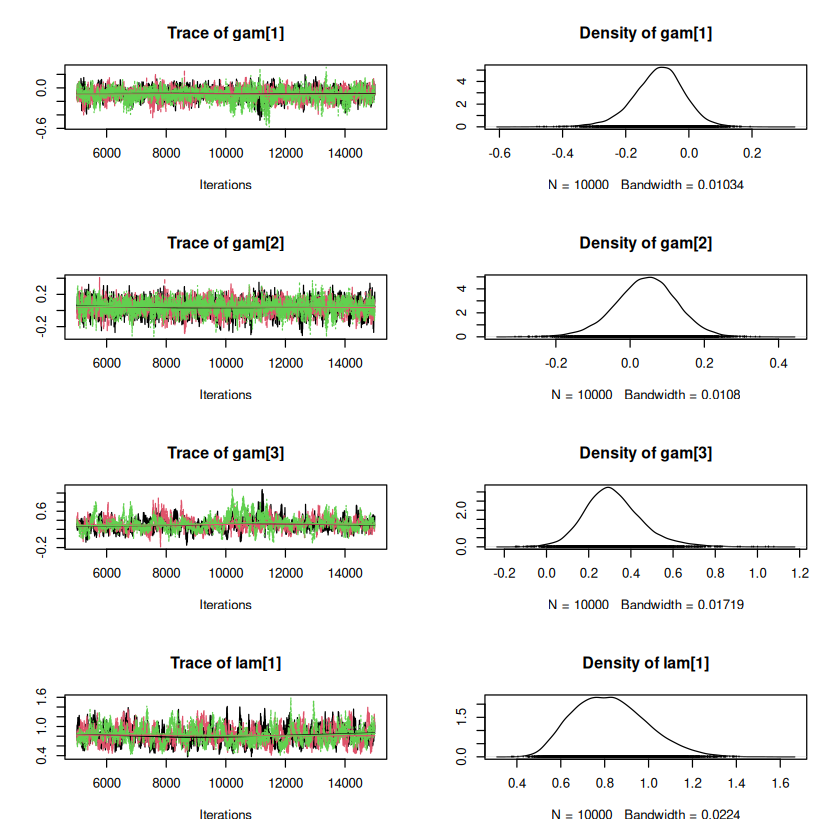

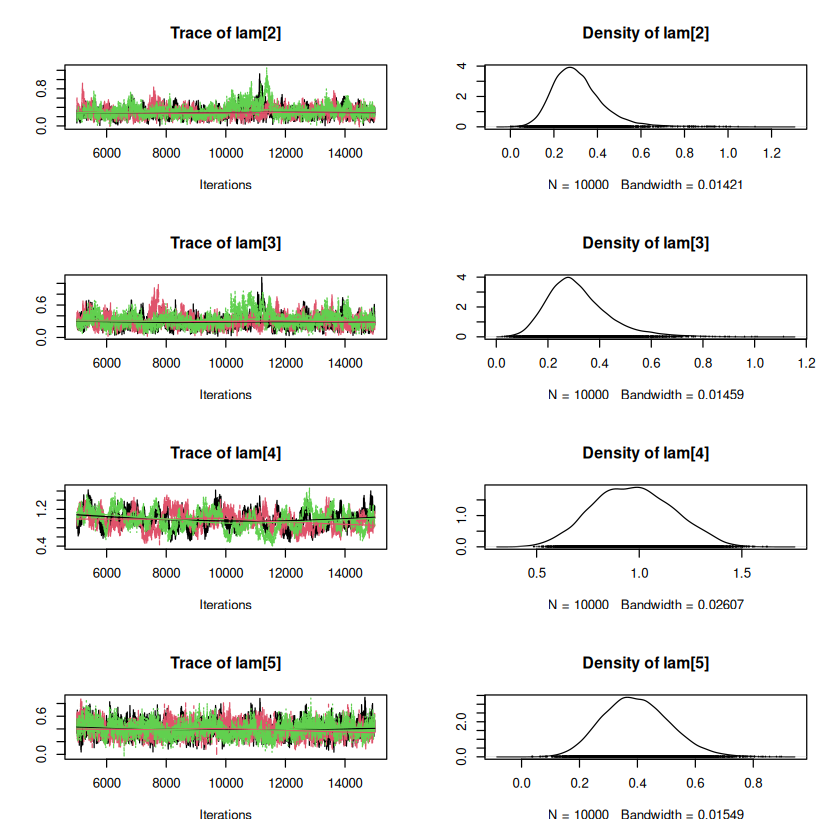

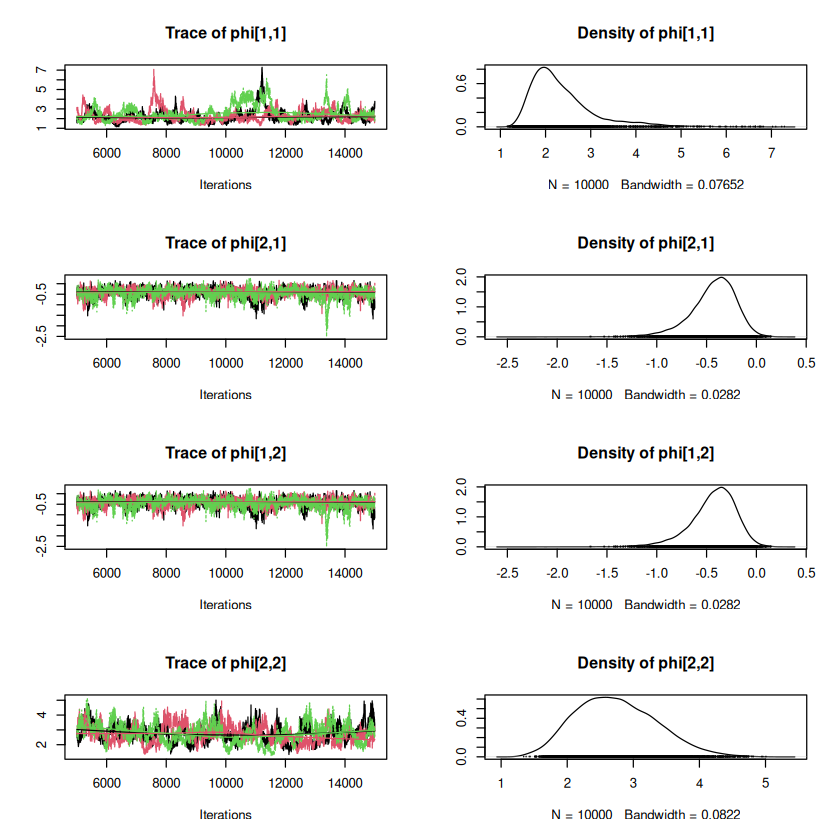

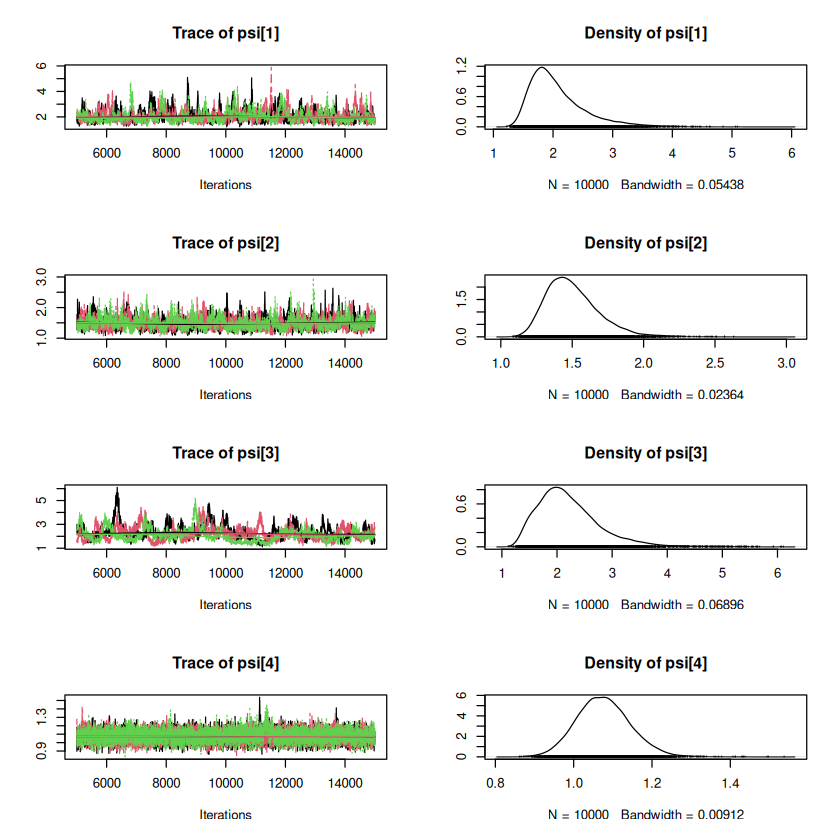

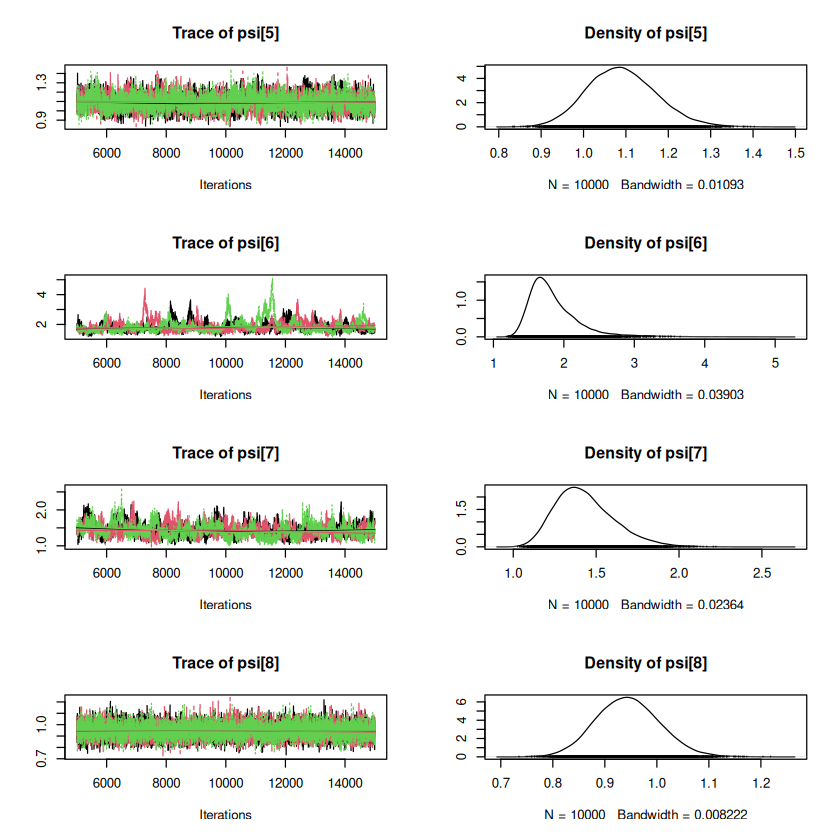

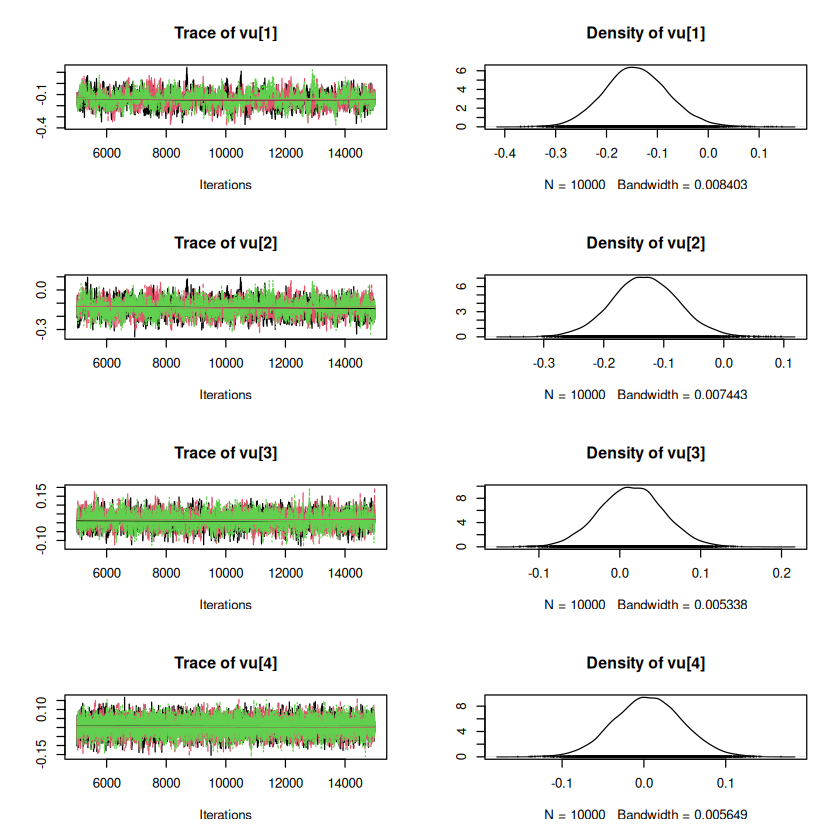

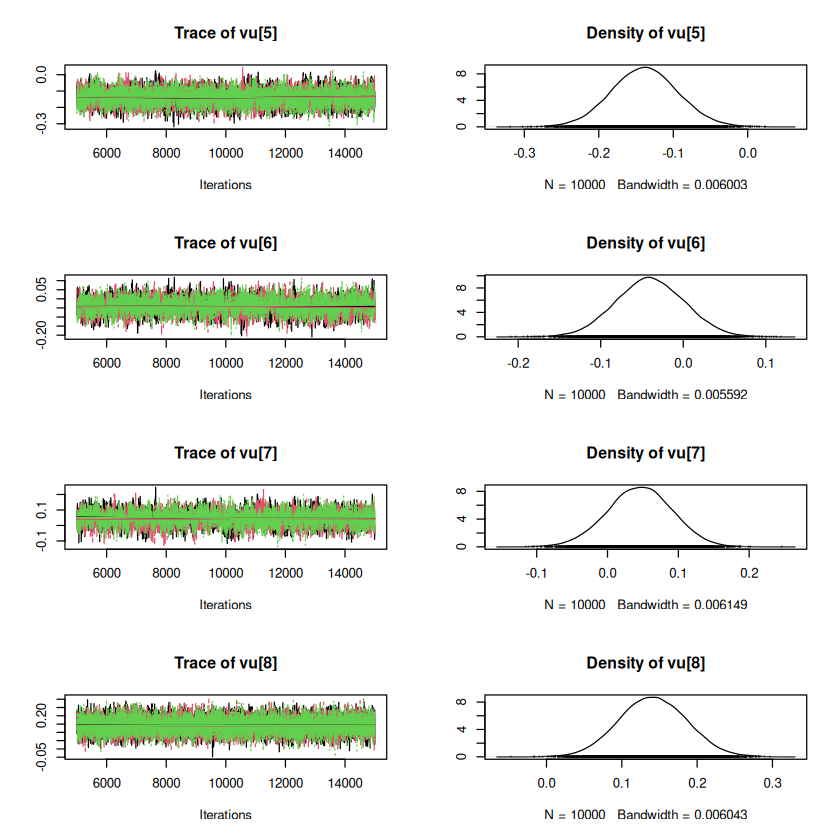

In [34]:
fit$conv$jags <- rjags::coda.samples(
    model$jags,
    param[-length(param)],
    iter
)

plot(fit$conv$jags)

##### Obtain Bayesian Statistics

In [35]:
fit$stats$jags  <- rjags::jags.samples(
    model$jags,
    param,
    iter
)
fit$stats$jags

$gam
mcarray:
[1] -0.0865791  0.0440355  0.3017307

Marginalizing over: iteration(10000),chain(3) 

$lam
mcarray:
[1] 0.8176838 0.2858724 0.2955945 0.9605357 0.3902541

Marginalizing over: iteration(10000),chain(3) 

$phi
mcarray:
           [,1]       [,2]
[1,]  2.1750842 -0.4017384
[2,] -0.4017384  2.7139084

Marginalizing over: iteration(10000),chain(3) 

$psi
mcarray:
[1] 2.0864664 1.4944833 2.3288120 1.0712340 1.0855694 1.8660280 1.4275602 0.9435496

Marginalizing over: iteration(10000),chain(3) 

$vu
mcarray:
[1] -0.144608389 -0.132255089  0.015509566  0.005667467 -0.139665134 -0.039309364  0.044073444  0.140351498

Marginalizing over: iteration(10000),chain(3) 

$xi
mcarray:
               [,1]         [,2]
  [1,] -0.952748577  0.126732667
  [2,]  0.660938895 -0.317704447
  [3,] -0.404748925 -0.217075067
  [4,]  0.572060415  0.470486604
  [5,] -0.162542329 -0.366688118
  [6,]  0.998999348  0.630228746
  [7,]  0.766946852 -0.191984484
  [8,]  0.234540378 -0.249190623
  [9,] -0.45

In [36]:
saveRDS(fit, file = "./Chapter12/fits.Rds")

#### Nimble

In [8]:
model$nimble <- readBUGSmodel(
    path$bugs,
    data = data,
    inits = list(
        gam = c(-0.5, -0.5, -0.5), 
        lam = c(-0.4, -0.4, -0.4, -0.4, -0.4), 
        b = c(-0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2), 
        psi = c(0.6, 0.7, 0.8, 0.75, 0.65, 0.76, 0.85, 0.89), 
        psd = 0.27, 
        vu = c(-0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1), 
        phi = structure(
            .Data = c(0.42, 0, 0, 0.25), 
            .Dim = c(2, 2)
        )
    )
)

Defining model



  [Note] Using 'R,y' (given within 'constants') as data.

Building model

Setting data and initial values

Running calculate on model
  [Note] Any error reports that follow may simply reflect missing values in model variables.

Checking model sizes and dimensions

  [Note] This model is not fully initialized. This is not an error.
         To see which variables are not initialized, use model$initializeInfo().
         For more information on model initialization, see help(modelInitialization).



In [9]:
fit$stats$nimbleMCMC <- nimbleMCMC(
    inits = inits,
    model = model$nimble, 
    monitors = param, 
    niter = iter,
    nburnin = burnin,
    nchains = 3
)

Compiling
  [Note] This may take a minute.
  [Note] Use 'showCompilerOutput = TRUE' to see C++ compilation details.

running chain 1...



|-------------|-------------|-------------|-------------|
|-------------------------------------------------------|


running chain 2...



|-------------|-------------|-------------|-------------|
|-------------------------------------------------------|


running chain 3...



|-------------|-------------|-------------|-------------|
|-------------------------------------------------------|


In [10]:
fit$stats$nimbleHMC <- nimbleHMC(
    inits = inits,
    model = model$nimble, 
    monitors = param, 
    niter = iter,
    nburnin = burnin,
    nchains = 3
)

Compiling
  [Note] This may take a minute.
  [Note] Use 'showCompilerOutput = TRUE' to see C++ compilation details.

running chain 1...



  [Note] NUTS sampler (nodes: vu[1], vu[2], vu[3], vu[4], vu[5], vu[6], vu[7], vu[8], b[1], b[2], b[3], b[4], b[5], b[6], b[7],...) is using 5000 warmup iterations.
         Since `warmupMode` is 'default' and `nburnin` > 0,
         the number of warmup iterations is equal to `nburnin`.
         The burnin samples will be discarded, and all samples returned will be post-warmup.
|-------------|-------------|-------------|-------------|
|-------------------------------------------------------|


running chain 2...



|-------------|-------------|-------------|-------------|
|-------------------------------------------------------|


running chain 3...



|-------------|-------------|-------------|-------------|
|-------------------------------------------------------|


In [14]:
saveRDS(fit, file = "./Chapter12/fits.Rds")

In [28]:
lapply(fit$nimble, function(x) {
as.data.frame(summary(x)) %>%
select(-"Var1") %>%
separate_wider_delim(Freq, ":", names_sep = "") %>%
pivot_wider(names_from = Freq1, values_from = Freq2)
})

Var2,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.
<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
gam[1],-0.39256,-0.14149,-0.08946,-0.09329,-0.04078,0.19865
gam[2],-0.265997,0.001787,0.053851,0.053779,0.108792,0.367126
gam[3],-0.07671,0.22040,0.29801,0.30758,0.38463,0.92002
lam[1],0.4102,0.7096,0.8137,0.8433,0.9578,1.5782
lam[2],-0.01133,0.22661,0.28382,0.29591,0.35470,0.69816
lam[3],0.01536,0.23098,0.28787,0.29837,0.35633,0.73411
lam[4],0.5130,0.8242,0.9659,0.9840,1.1348,1.6413
lam[5],0.05504,0.32233,0.39588,0.40182,0.47463,0.91415
"phi[1, 1]",1.312,1.848,2.137,2.227,2.462,4.582


In [1]:
lapply(fit$nimble_HMC, function(x) {
as.data.frame(summary(x)) %>%
select(-"Var1") %>%
separate_wider_delim(Freq, ":", names_sep = "") %>%
pivot_wider(names_from = Freq1, values_from = Freq2)
})

list()

In [ ]:
model$nim$calculate("lam")